<img src="./imgpsh_fullsize_anim.jpeg" style="text_align:center"></img>

<div><img src="https://raw.githubusercontent.com/meetAmarAtGithub/PES_MTech_Assignments/master/NPV_Statitical%20Anlysis%20of%20Diabetes%20Dataset/pics/Team.JPG"></div>

In [55]:
pip install wordcloud

     |████████████████████████████████| 220 kB 2.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158509 sha256=f22265d5910f02e1ffb1a59dc244ec7f52586b258c4b7211a98d0f83118cc49e
  Stored in directory: /Users/raj8lm/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [484]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import statsmodels
import statsmodels.api as smapi
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# import 'random' to generate random sample
import random
# import statistics to perform statistical computations
import statistics
import statsmodels as sm

import scikit_posthocs as sp

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
import scikit_posthocs

from sklearn.preprocessing import StandardScaler


<hr style=\"border:2px solid gray\"> </hr>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto&display=swap">    
<a id="DataDescription"> 
<div style="font-family: 'Roboto', serif; text-align:center; font-size: 40px; text-align:center;"><br/> 1. Data Description</div>
<br/></a>

In [7]:
csv_path = 'movies_metadata.csv'
df = None
df = pd.read_csv(csv_path)

## OBJECTIVE:

### Find significant FACTORS which influence very high profitability in Movie Production.

In [8]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [236]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [469]:
# FUNCTIONS USED THROUGHOUT THIS NOTEBOOK

import ast    
from scipy.stats import spearmanr


def clean_and_convert_to_float(input_value):
    try:
        if type(input_value) is float:
            return input_value
        evaluated_val = ast.literal_eval(input_value)
        if type(evaluated_val) is float or type(evaluated_val) is int:
            return evaluated_val
        else:
            print(type(evaluated_val))
            return 0
    except:
        print(type(input_value), input_value)
        return None

def clean_empty_lists(input_val):
    try:
        evaluated_val = ast.literal_eval(input_val)
        if type(evaluated_val) is list:
            if len(evaluated_val) == 0:
                return "EMPTY_LIST"
            else:
                return evaluated_val
        elif type(evaluated_val) is str:
            return "EMPTY_LIST"
        else:
            return "EMPTY_LIST"
    except:
        return "EMPTY_LIST"
        
def _get_key_from_json(input_obj, key):
    try:       
        return input_obj.get(key)
    except:
        pass
    return None

### Added by Gopal
def _categorize_data_based_on_count(input_val):
    if len(input_val) <= 1:
        return "Individual"
    else:
        return "Consortium"

##############added by Radha
def _categorize_data_based_on_count_and_language(input_val):
    if (input_val == 'Single_Language') | (input_val == 'Silent_Film'):
        return input_val
    else:
        return "MultiLingual"
    

def _categorize_data_based_on_margin(input_val):
    if input_val >= 4:
        return "High"
    elif input_val < 4 and input_val >0 :
        return "Low"
    else:
        return "Loss"

def json_to_list(input_val, key_to_extract):
    """
    This is how you can create a new column, for example new_col, list_genres for already existing columns with JSON string data
    Passed the key 'name' for extracting that information. If you want to extract any other info, then pass the key instead of the one passed
    Multiple KEYS for extraction is not supported now
    > df['new_col'] = df['belongs_to_collection'].apply(json_to_list, args=('name',))
    > df['list_genres'] = df['genres'].apply(json_to_list, args=('name',))
    
    > df['new_col']
    > df['list_genres']
    """
    if pd.isnull(input_val):
        return ""
    else:
        try:
            eval_input = ast.literal_eval(input_val)
            if type(eval_input) is list:
                return_arr = []
                for entry in eval_input:
                    return_arr.append(_get_key_from_json(entry, key_to_extract))
                return return_arr
            elif type(eval_input) is dict:
                return _get_key_from_json(eval_input, key_to_extract)
        except:
            pass

def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num


def _perform_test(sample_df, col_1, col_2, test_name):
    #     tanh(arctanh𝑟±1.96/𝑛−3‾‾‾‾‾√),
    if test_name.lower() == "spearmanr":
        coeff, p = spearmanr(sample_df[col_1], sample_df[col_2])
        r_delta = np.arctanh(coeff)
        se = 1/np.sqrt(sample_df.size-3)
        delta = 1.96 * se
        lo_delta, hi_delta = r_delta-delta*se, r_delta+delta*se
        lo, hi = np.tanh((lo_delta, hi_delta))
        return lo, hi
    elif test_name.lower() == 'lognormal':    
        mu = sample_df[col_2].mean()
        sd =sample_df[col_2].std()
        n =sample_df[col_2].count()
        me =sample_df[col_2].median()
        lo, hi = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
        return lo, hi
        

def simulate_test_for_sample(input_df, col_1, col_2, sample_size: int, test_name, population_statistic, alpha:float):
    np.random.seed(23)
    total_size = len(input_df)
    shrinked_df = input_df[[col_1, col_2]]
    total_iterations = total_size//sample_size
    positive_counter = 0
    plt_array = []
    range_arr = []
    for i in range(total_iterations):
        df_size = len(shrinked_df)
        if df_size < sample_size:
            sample_size = df_size
        df_sample = shrinked_df.sample(n=sample_size)
        low_interval, high_interval = _perform_test(df_sample, col_1, col_2, test_name)
        if population_statistic <= low_interval:
            positive_counter += 1     
        plt_array.append((low_interval+high_interval)/2)
        range_arr.append(high_interval - low_interval)
        shrinked_df = pd.concat([shrinked_df,df_sample]).drop_duplicates(keep=False)
    simulation_match_percentage = (positive_counter/total_iterations)*100
    
    plt.errorbar(x=plt_array, y=range(total_iterations), xerr=range_arr, fmt='o', color='k')
    plt.axvline(population_statistic, ls='--') # this is only to demonstrate that 95%
                          # of the 95% CI contain the actual mean
    plt.xlim(-5,15)
    plt.yticks([])
    plt.show();
    
    print(f"Matched {simulation_match_percentage}% of times.")


def sort_val_within_row(input_list):
    sorted_list = sorted(input_list)
    return ','.join(str(e) for e in sorted_list)

### First convert the relevant columns to float

In [10]:
# Converting budget to float and adding a new column
df['budget_float'] = df['budget'].apply(clean_and_convert_to_float)

<class 'str'> /ff9qCepilowshEtG2GYWwzt2bs4.jpg
<class 'str'> /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
<class 'str'> /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [11]:
# Correcting the values in the budget which are supposed to be Millions
df[['budget_float', 'revenue']] = df[['budget_float', 'revenue']].applymap(scale)

In [12]:
# Removing all the rows with no data in budget_float
df = df[df['budget_float'] != 0]
df = df[df['budget_float']!="null"]

In [13]:
# Removing all the rows with no data in revenue
df = df[df['revenue'] != 0]
df = df[df['revenue']!="null"]

In [14]:
# Calculating the margin that we have acheived on the movie
df['margin'] = df['revenue']/df['budget_float'] - 1

In [15]:
print(len(df['margin']))
df.shape

5384


(5384, 26)

In [16]:
df[df['margin']>1000]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,budget_float,margin
2308,False,"{'id': 8580, 'name': 'The Karate Kid Collectio...",113,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,8856,tt0091326,en,"The Karate Kid, Part II",Mr. Miyagi and Daniel take a trip to Okinawa t...,9.231318,/4zmEPGKrD3sgjHZUs99tknEBaJy.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",1986-06-18,115103979.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"This time, the combat is real.","The Karate Kid, Part II",False,5.9,457.0,113000.0,1017.619283
2595,False,"{'id': 64750, 'name': 'Blair Witch Collection'...",60000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.blairwitch.com/,2667,tt0185937,en,The Blair Witch Project,In October of 1994 three student filmmakers di...,14.838386,/ip2IqmvCqFzvPe8RAHpT1My6XM9.jpg,"[{'name': 'Artisan Entertainment', 'id': 2188}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1999-07-14,248000000.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,False,6.3,1090.0,60000.0,4132.333333
14192,False,"{'id': 41437, 'name': 'Paranormal Activity Col...",15000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.paranormalactivity-movie.com/,23827,tt1179904,en,Paranormal Activity,"After a young, middle class couple moves into ...",12.706424,/ns7J1iMSDs5UkEVjMXLPiss7Lrt.jpg,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-09-14,193355800.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What Happens When You Sleep?,Paranormal Activity,False,5.9,1351.0,15000.0,12889.386667
41472,False,NaN,5000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,363093,tt5066556,ko,대호,While the Kingdom of Korea is under occupation...,3.447894,/tPI6t2Cvu7vWO9iDs4Cigq8svWl.jpg,"[{'name': 'Next Entertainment World', 'id': 26...","[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2015-12-16,11083449.0,139.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,NaN,The Tiger: An Old Hunter's Tale,False,7.5,17.0,5000.0,2215.689800


### For movie 'The Tiger: An Old Hunter's Tale' budget information 5000 is very small, and we could not validate the autheticity of the data. So removing this row as it is contributing to the outlier part.

In [17]:
df.drop(41472, inplace=True)

In [24]:
n = len(df['margin'])
# Conventional way of doing it
# t_interval = stats.t.interval(0.95, df=n-1, loc = df['margin'].mean(), scale = df['margin'].std() / np.sqrt(n))

# For non-parametric data
interval = stats.lognorm.interval(0.05, s=df['margin'].std(), loc = df['margin'].median(), scale = np.exp(df['margin'].median()))
interval

(1.0589906567809382, 343420.60749951965)

## TARGET SETTING

With 95% confidence, we get the interval as shown above. We are targeting for the middle value which is the mean of 'margin'.
So we are targetting margin >= 3.18(3*1.06 -> lower lognorm interval) 

In [157]:
target_margin = 3.18

## DATA CLEANING

After preliminary analysis of the data, we found 5 contributing factors(Independent variables) to the profitability/margin(Dependent variable) of a movie:
* Genre of the movie(Genre)
* Production Houses behind the movie('production_companies')
* Languages in which a movie is released('spoken_languages')
* Popularity of the movie before and after release('popularity')
* Runtime of the movie('runtime')

In [26]:
df['popularity'].describe()

count     5381.000000
unique    5380.000000
top          9.003792
freq         2.000000
Name: popularity, dtype: float64

In [ ]:
# df.to_excel("test.xlsx")
# Getting rid of empty lists from categorical column Genres
df['genres_clean'] = df['genres'].apply(clean_empty_lists)

df=df[df['genres_clean']!="EMPTY_LIST"]

df.drop(['genres_clean'], axis=1)

In [ ]:
df['prod_companies_clean'] = df['production_companies'].apply(clean_empty_lists)

df=df[df['prod_companies_clean']!="EMPTY_LIST"]

df.drop(['prod_companies_clean'], axis=1)

In [29]:
df['spoken_languages'].describe()

count                                         5198
unique                                         616
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                          3275
Name: spoken_languages, dtype: object

In [ ]:
df['spoken_lang_clean'] = df['spoken_languages'].apply(clean_empty_lists)

df=df[df['spoken_lang_clean']!="EMPTY_LIST"]

df.drop(['spoken_lang_clean'], axis=1)

### Removing 0 and null values

In [32]:
print(len(df[df['popularity'] == 0]))
print(len(df[df['runtime'] == 0]))

0
6


In [33]:
# Finding the count of values which ran into loss
print(len(df[df['revenue'] < df['budget_float']]))

1508


In [34]:
# Count of movies with loss | no profit - no loss | profit
print(len(df[df['margin'] < 0]))
print(len(df[df['margin'] == 0]))
print(len(df[df['margin'] > 0]))

1508
13
3665


In [35]:
df=df[df['runtime']!=0]

### Some more data formatting

In [37]:
df['list_genres'] = df['genres'].apply(json_to_list, args=('name',))

In [38]:
df['list_prod_companies'] = df['production_companies'].apply(json_to_list, args=('name',))

In [39]:
df['list_spoken_languages'] = df['spoken_languages'].apply(json_to_list, args=('iso_639_1',))

## CLEANED DATASET

In [80]:
df_clean = df

#### TEST DATASET WITH REDUCED MARGIN

In [83]:
df['margin'].describe()
# Q3 = 3.27804
# Q1 = 0.178955
IQR = 3.278046 + 0.178955
df_outlier_free = df_clean[df_clean['margin'] < 1.5*IQR]

In [523]:
df_clean

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,budget_float,margin,genres_clean,prod_companies_clean,spoken_lang_clean,list_genres,list_prod_companies,list_spoken_languages
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,30000000.0,11.451801,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_639_1': 'en', 'name': 'English'}]","[Animation, Comedy, Family]",[Pixar Animation Studios],[en]
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,65000000.0,3.043035,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,16000000.0,4.090760,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_639_1': 'en', 'name': 'English'}]","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[en]
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,60000000.0,2.123947,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]","[en, es]"
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,35000000.0,0.838576,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_639_1': 'en', 'name': 'English'}]","[Action, Adventure, Thriller]","[Universal Pictures, Imperial Entertainment, S...",[en]
...,...,...,...,...,...,...,...,...,...,...,...

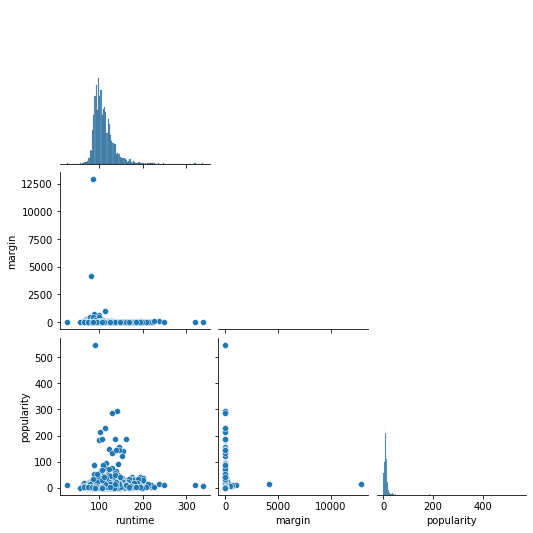

In [535]:
df_formatted_for_pair_plot=df_clean[['runtime','margin']]
df_formatted_for_pair_plot['popularity'] = df_clean['popularity'].apply(clean_and_convert_to_float)
df_formatted_for_pair_plot['list_spoken_languages'] = df_clean['list_spoken_languages'].apply(sort_val_within_row)
df_formatted_for_pair_plot['list_genres'] = df_clean['list_genres'].apply(sort_val_within_row)
df_formatted_for_pair_plot['list_prod_companies'] = df_clean['list_prod_companies'].apply(sort_val_within_row)

sns.pairplot(df_formatted_for_pair_plot, corner=True)


<AxesSubplot:>

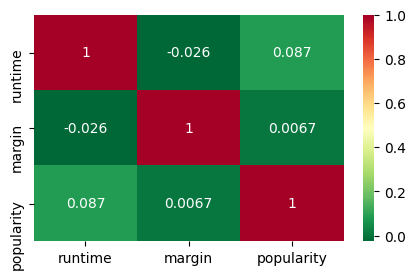

In [537]:
cmatrix=df_formatted_for_pair_plot.corr() 
plt.figure(figsize=(5,3),dpi=100)
sns.heatmap(cmatrix,annot=True,cmap='RdYlGn_r')

### Determining the Distribution of the Data

##### Ref: https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/

In [121]:
y_df = df_genres['margin']
y_df.describe()

# sc=StandardScaler() 
# # yy = y.reshape (-1,1)
# sc.fit(df_genres[[]])
# y_std =sc.transform(yy)
# y_std = y_std.flatten()
y_std = y_df
# del yy

# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * len(df_genres)
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution     chi_square  p_value
3      lognorm     569.369407      0.0
0         beta     614.332772      0.0
8  weibull_min    4489.143992      0.0
5     pearson3   23972.422596      0.0
1        expon   31437.767448      0.0
2        gamma  122333.179946      0.0
4         norm  124124.369101      0.0
6       triang  126614.535949      0.0
7      uniform  126756.809385      0.0
9  weibull_max  127086.398133      0.0


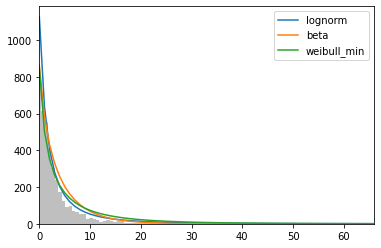


Distribution parameters:
------------------------

Distribution: lognorm
Parameters: (1.3584351795055882, -1.0706571608614914, 1.946280141271521)

Distribution: beta
Parameters: (0.7053039270444468, 4260.78802272678, -0.9997899166666667, 23248.352905526874)

Distribution: weibull_min
Parameters: (0.5997344484351665, -0.9997899166666667, 3.608399839962343)


In [122]:
# Divide the observed data into 100 bins for plotting (this can be changed)
y = df_genres['margin']
x = np.arange(len(y))
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names:
    # Set up distribution and store distribution paraemters
    dist = getattr(stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.show()

# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )

<AxesSubplot:xlabel='margin', ylabel='Density'>

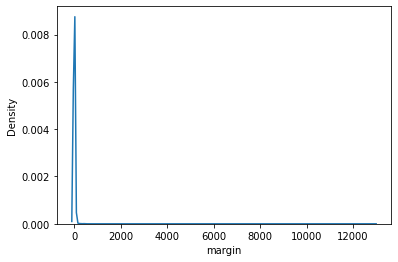

In [123]:
sns.kdeplot(df['margin'])

## HYPOTHESIS-1 :

#### RUNTIME (WILL COXON[p-value/critical-value] | Z-Test | Simulation)

In [476]:
df_clean['runtime'].describe()

count    5180.000000
mean      110.185907
std        21.380191
min        26.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

In [479]:
df_runtime_high_margin = df_clean[df_clean['margin'] > 4]
print(df_runtime_high_margin['runtime'].median())
df_runtime_high_margin['runtime'].describe()

106.0


count    1066.000000
mean      110.368668
std        23.520885
min        26.000000
25%        94.000000
50%       106.000000
75%       122.000000
max       238.000000
Name: runtime, dtype: float64

In [480]:
df_runtime_low_margin = df_clean[df_clean['margin'] <= 4]
print(df_runtime_low_margin['runtime'].median())
df_runtime_low_margin['runtime'].describe()

106.0


count    4114.000000
mean      110.138551
std        20.792405
min        63.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

### <span style="color:Green">There is no sigficant difference in runtime between high and low margin movies.</span>
### <span style="color:Green">110 is recomended runtime for a movie.</span>


### <span style="color:Green">H<sub>0</sub>, median run-time of high margin(106) and low margin movie is same.</span>
### <span style="color:Green">H<sub>1</sub>, median run time of high margin(106) and low margin movie is different.</span>
### <span style="color:Green">We will test above hypothesis with 95% level of confidence.</span>

## <span style="color:Orange">Normality test of runtime</span>

<AxesSubplot:xlabel='runtime', ylabel='Count'>

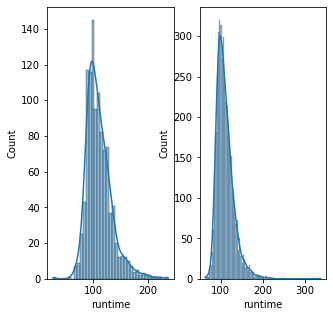

In [137]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
sns.histplot(df_runtime_high_margin['runtime'],ax=ax[0],kde=True)
sns.histplot(df_runtime_low_margin['runtime'],ax=ax[1],kde=True)

#### We will use Shapiro-Wilk test for checking normality of continuous dependent variable.

In [481]:
stats.shapiro(df['margin'])

ShapiroResult(statistic=0.013239264488220215, pvalue=0.0)

#### <span style="color:Black"> Since p-value is 0.0, we can infer that the distribution is not normal.</span>

## <span style="color:Orange">Wilcoxon Rank Sum Test</span>

This test is used to compare the medians of unpaired data which is not normal. 

Consider a sample of size $n_{1}$ from a variable `X` with median $m_{1}$ and another sample of size $n_{2}$ from variable `Y` with median $m_{2}$. Let, $M = m_{1} - m_{2}$

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: M = 0$ or $M \geq 0$ or $M \leq 0$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: M \neq 0$ or $M < 0$ or $M > 0$</strong></p>


The test statistic is given as:
<p style='text-indent:25em'> <strong> $T = $ Sum of ranks assigned to X</strong></p>

If the sample sizes ($n_{1}, n_{2}$) are large ($\geq 15$) then the distribution of $T^{*}$ follows a standard normal distribution  and $T^{*} = \frac{T - \frac{n_{1}(N+1)}{2}}{\sqrt{\frac{n_{1}n_{2}(N+1)}{12}}}$ 

The null and alternative hypothesis is:

H<sub>0</sub>: $M \geq 110$ (Population mean)<br>
H<sub>1</sub>: $M < 110$ (Population mean)

### Test null hypothesis using Wilcoxon Rank Sum Test

In [485]:
# draw a sample for grades of 18 students without replacement
# set a random seed to get the same sample each time you run the code
random.seed(1)

# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
A = random.sample(population = list(df_runtime_high_margin['runtime']), k = 500)
B = random.sample(population = list(df_runtime_low_margin['runtime']), k = 500)


# compute test statistic and corresponding p-value for two-tailed test
test_stat, p_value = stats.ranksums(A, B)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: -1.111430759726549
p-value: 0.266382978290415


### Test null hypothesis using Mann-Whitney U Test

In [486]:
test_stat2, p_value2 = stats.mannwhitneyu(A, B, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat2)
print('p-value:', p_value2)

Test statistic: 119924.5
p-value: 0.2663478202184445


In our example, the hypothesis test is one-tailed. Thus, we divide the two-tailed probability by 2 to obtain the one-tailed probability.

In [487]:
# divide the p-value by 2
req_p_val = p_value/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', test_stat)
print('p-value:', req_p_val)

Test Statistic: -1.111430759726549
p-value: 0.1331914891452075


## <span style="color:Orange">Decision</span>

SInce the p-value is greater than 0.05. Thus we fail to reject the null hypothesis and we have enough evidence to conclude that runtime of a movie does not influence the revenue(margin) of a movie.

## HYPOTHESIS-2 :

#### POPULARITY (WILL COXON[p-value/critical-value] | One-sample T-Test | Simulation)

<AxesSubplot:xlabel='margin', ylabel='Density'>

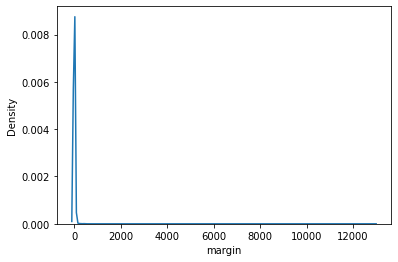

In [292]:
sns.kdeplot(x=df['margin'],legend=True)

Shapiro-Wilk Test: The shapiro wilk test evaluates a data sample and can tell us the probability of how likely the data was picked from a Gaussian distribution. This Test is more suitable for sample data < 5000

> Its power characteristics are well known and may be summarized by saying that it is strongest against short-tailed (platykurtic) and skew distributions and weakest against symmetric moderately long- tailed (leptokurtic) distributions.


Kolmogorov-Smirnov Goodness-of-Fit Test
> The limitation of this test is it is more sensitive towards the centre of the distribution, than at the tails. Also,if location, scale, and shape parameters are estimated from the data, the critical region of the K-S test is no longer valid. It typically must be determined by simulation.


Anderson Darling Test(it gives more weightage to Tail than the K-S test)


D’Agostino’s K^2 Test takes skewness and kurtosis into account and is therefore a relevant test in this context

Ref: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Since this data-set is leptokurtic as well as long tailed, Shapiro-Wilk test is not the best bet and we will use both Shapiro and D’Agostino’s K^2 for verification

In [293]:
from scipy.stats import shapiro

stat, p = shapiro(df['margin'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.013, p=0.000
Sample does not look Gaussian (reject H0)


In [295]:
# The D’Agostino’s K^2 Test is available in normaltest
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['margin'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=17684.589, p=0.000
Sample does not look Gaussian (reject H0)


#### NULL HYPOTHESIS(data is normal) IS REJECTED.

Both the above tests prove that the data is not normal and so we would be choosing non-parametric tests

In [296]:
# To test if popularity is effecting the margin of a movie, we need to do linear regression analysis
# Lets do a scatter plot to see the relation between popularity and margin

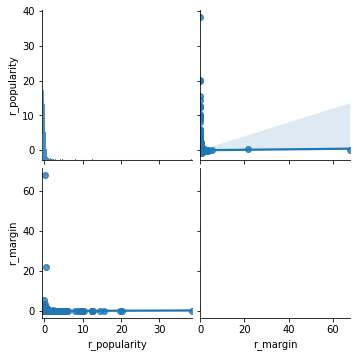

In [525]:
from sklearn.preprocessing import StandardScaler
standardize_params = StandardScaler()
df_standard_scale = pd.DataFrame(standardize_params.fit_transform(df_clean[['popularity','margin']]), columns=["r_popularity","r_margin"])
sns.pairplot(df_standard_scale, vars=['r_popularity','r_margin'],
                 kind='reg')

In [499]:
len(df_standard_scale)

5180

In [505]:
df_standard_scale['r_popularity'] = df_standard_scale['r_popularity'].apply(clean_and_convert_to_float)

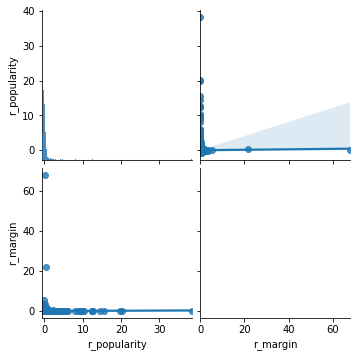

In [506]:
sns.pairplot(df_standard_scale, vars=['r_popularity','r_margin'],kind='reg')

In [343]:
# calculate spearman's correlation
from scipy.stats import spearmanr


In [504]:
df_standard_scale

,r_popularity,r_margin
0,0.848851,0.018364
1,0.496304,-0.025919
2,-0.444225,-0.020401
3,0.561316,-0.030759
4,-0.346135,-0.037528
...,...,...
5175,2.918970,-0.040979
5176,1.688694,-0.040163
5177,2.196431,0.041248
5178,-0.625518,-0.038872


In [507]:
coef, p = spearmanr(df_standard_scale['r_popularity'], df_standard_scale['r_margin'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.267
Samples are correlated (reject H0) p=0.000


In [ ]:
# Null Hypothesis is rejected - There is a correlation between popularity and margin

<AxesSubplot:xlabel='r_margin', ylabel='Density'>

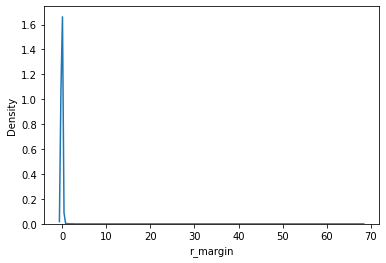

In [509]:
# Lets check the shape of the data.
sns.kdeplot(x=df_standard_scale['r_margin'],legend=True)

<AxesSubplot:xlabel='r_popularity', ylabel='Density'>

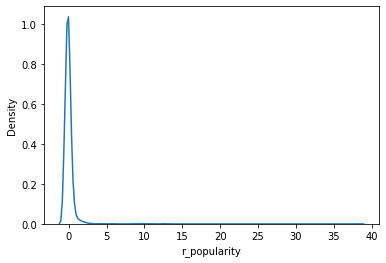

In [510]:
sns.kdeplot(x=df_standard_scale['r_popularity'],legend=True)

In [ ]:
# Shape is important while doing the simulation: Which we would be seeing in the end.

## HYPOTHESIS-3 :

#### LANGUAGES (MANN WHITNEY U TEST[critical/p-value/confidence-interval] | CHI-SQUARE | SIMULATION)

In this dataset we have original language , the language the movie is released in and spoken languages, the languages the movie gets dubbed into.

The null and alternative hypothesis is:

H0 : There is no difference in margin between a single language movie and a multilingual movie.

H1 : There is a difference in margin

In [441]:
df_language_hypothesis = df_clean[['original_language','list_spoken_languages','margin']]
df_language_hypothesis['list_spoken_languages']  = df_language_hypothesis['list_spoken_languages'].apply(sort_val_within_row)
df_language_hypothesis

,original_language,list_spoken_languages,margin
0,en,en,11.451801
1,en,"en,fr",3.043035
3,en,en,4.090760
5,en,"en,es",2.123947
8,en,en,0.838576
...,...,...,...
45014,en,en,0.183333
45139,en,en,0.338279
45167,en,en,15.797291
45250,ta,"ta,te",0.583333


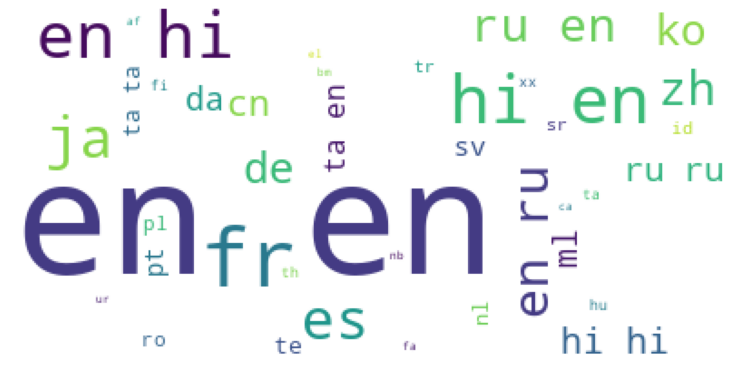

In [442]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

overview = ' '.join(df_language_hypothesis['original_language'].fillna('').values)

plt.figure(figsize =(13,13))
ov_wc = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=stopwords 
)

# generate the word cloud
ov_wc.generate(overview)
plt.imshow(ov_wc)
plt.axis('off')
plt.show()

In [443]:
df_language_hypothesis['list_spoken_languages'].replace({'xx':'Silent_Film'},inplace=True)

In [444]:
### To populate the column with Single Language
df_language_hypothesis['Released_Languages'] = np.where(df_language_hypothesis['original_language'] == df_language_hypothesis['list_spoken_languages'], 'Single_Language', df_language_hypothesis['list_spoken_languages'])

In [445]:
### To populate column with MultiLingual
df_language_hypothesis['Released_Languages_Final'] = df_language_hypothesis['Released_Languages'].apply(_categorize_data_based_on_count_and_language)

In [446]:
df_language_hypothesis.drop(['Released_Languages'], axis=1)

,original_language,list_spoken_languages,margin,Released_Languages_Final
0,en,en,11.451801,Single_Language
1,en,"en,fr",3.043035,MultiLingual
3,en,en,4.090760,Single_Language
5,en,"en,es",2.123947,MultiLingual
8,en,en,0.838576,Single_Language
...,...,...,...,...
45014,en,en,0.183333,Single_Language
45139,en,en,0.338279,Single_Language
45167,en,en,15.797291,Single_Language
45250,ta,"ta,te",0.583333,MultiLingual


In [447]:
language_sum = df_language_hypothesis.groupby(by="Released_Languages_Final").agg({'margin':['count','mean','std','skew','median']})
language_sum

margin                                            
                          count       mean         std       skew    median
Released_Languages_Final                                                   
MultiLingual               1626   3.202484   17.463947  32.087454  1.097233
Silent_Film                   7  17.223945   40.620224   2.605747  0.522843
Single_Language            3547  10.129541  229.163050  51.774901  1.093116

In [449]:
## Median at 95% confidence interval for MultiLingual
sd =language_sum.iloc[0][2]
n =language_sum.iloc[0][0]
me =language_sum.iloc[0][4]

interval = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
print(interval)

(2.0993602569923686, 10.05338621846912)


In [450]:
## Median at 95% confidence interval for Silent_Film
sd =language_sum.iloc[1][2]
n =language_sum.iloc[1][0]
me =language_sum.iloc[1][4]

interval = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
print(interval)

(0.654926177227213, 22.064874025634804)


In [472]:
## Median at 95% confidence interval for Single_Language
sd =language_sum.iloc[2][2]
n =language_sum.iloc[2][0]
me =language_sum.iloc[2][4]

interval = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
print(interval)

(1.0931178764837954, 5194925.668698457)


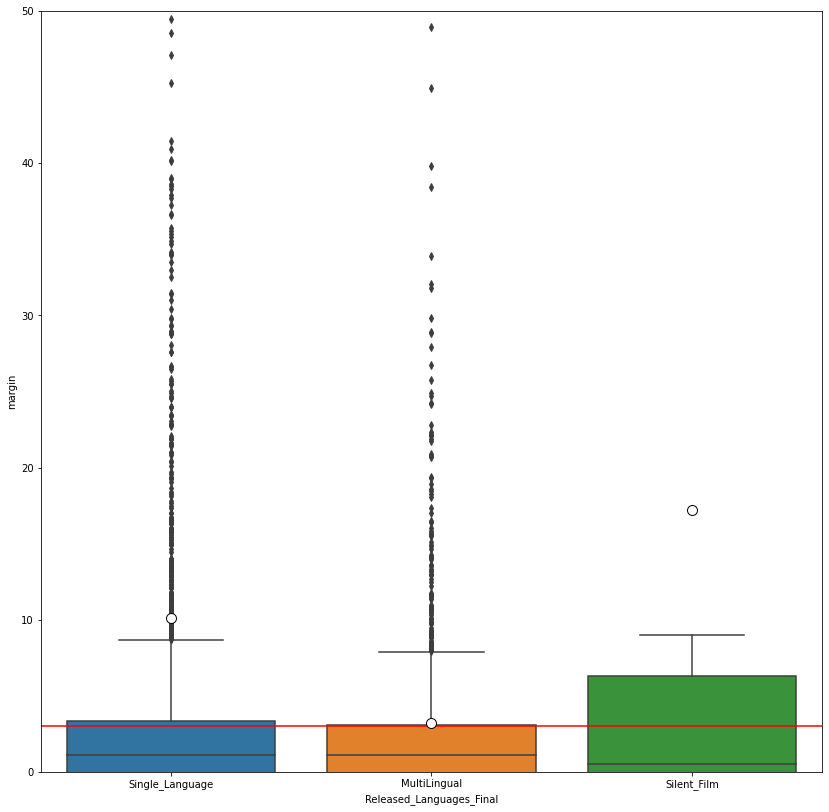

In [452]:
fig, ax = plt.subplots(1,1, figsize=(14,14))
box_plot = sns.boxplot(x = 'Released_Languages_Final', y = 'margin', data = df_language_hypothesis,ax=ax,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylim(0,50)
plt.axhline(3, color='red')

We will not take silent film into consideration for analysis and focus on Single Language and Multiple Languages.

#### As margins are not normally distributed, we need to use non-parametric test. 
#### Mannwhitney Test - A popular nonparametric test to compare outcomes between two independent groups is the Mann Whitney U test. The Mann Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test, is used to test whether two samples are likely to derive from the same population 

MANN WHITNEY U TEST

In [484]:
x1=np.array(df_language_hypothesis[df_language_hypothesis.Released_Languages_Final== 'Single_Language'].margin)
y1=np.array(df_language_hypothesis[df_language_hypothesis.Released_Languages_Final== 'MultiLingual'].margin)

print(x1)
print(y1)

[11.4518011   4.09075975  0.83857631 ...  0.18333333  0.33827878
 15.79729136]
[ 3.0430346   2.12394697  5.07231093 ...  3.27570469  0.58333333
 -0.3656035 ]


In [485]:
###MANN WHITNEY U TEST
pvalue=stats.mannwhitneyu(x1,y1)
print(pvalue)

MannwhitneyuResult(statistic=2879916.0, pvalue=0.4696728050812229)


Since the p-value is greater than 0.05 we fail to reject the H0 and that see that margin is not different for multilingual or single language movies. Thus language is not one of the major factors


## HYPOTHESIS-4 :

#### PRODUCTION COMPANIES (MANN WHITNEY U TEST[critical/p-value/confidence-interval] | TWO SAMPLE T TEST | SIMULATION)

In [279]:
df_production_hypothesis = df_clean[['list_prod_companies','margin','revenue','budget_float']]
df_production_hypothesis['Ind_or_con'] = df_production_hypothesis['list_prod_companies'].apply(_categorize_data_based_on_count)
df_production_hypothesis['margin_cat']= df_production_hypothesis['margin'].apply(_categorize_data_based_on_margin)
df_production_hypothesis['list_prod_co']= df_production_hypothesis['list_prod_companies'].apply(sort_val_within_row)
df_production_hypothesis.head()


,list_prod_companies,margin,revenue,budget_float,Ind_or_con,margin_cat,list_prod_co
0,[Pixar Animation Studios],11.451801,373554033.0,30000000.0,Individual,High,Pixar Animation Studios
1,"[TriStar Pictures, Teitler Film, Interscope Co...",3.043035,262797249.0,65000000.0,Consortium,Low,"Interscope Communications,Teitler Film,TriStar..."
3,[Twentieth Century Fox Film Corporation],4.090760,81452156.0,16000000.0,Individual,High,Twentieth Century Fox Film Corporation
5,"[Regency Enterprises, Forward Pass, Warner Bros.]",2.123947,187436818.0,60000000.0,Consortium,Low,"Forward Pass,Regency Enterprises,Warner Bros."
8,"[Universal Pictures, Imperial Entertainment, S...",0.838576,64350171.0,35000000.0,Consortium,Low,"Imperial Entertainment,Signature Entertainment..."


In [280]:
prod_co_sum = df_production_hypothesis.groupby(by="Ind_or_con").agg({'margin':['count','mean','std','skew','median']})
prod_co_sum 

margin                                           
            count      mean         std       skew    median
Ind_or_con                                                  
Consortium   3928  8.747684  217.540496  54.667518  1.071653
Individual   1252  5.508295   27.258165  12.884054  1.177121

In [281]:
df_production_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 45412
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   list_prod_companies  5180 non-null   object 
 1   margin               5180 non-null   float64
 2   revenue              5180 non-null   float64
 3   budget_float         5180 non-null   float64
 4   Ind_or_con           5180 non-null   object 
 5   margin_cat           5180 non-null   object 
 6   list_prod_co         5180 non-null   object 
dtypes: float64(3), object(4)
memory usage: 452.8+ KB


Index(['Consortium', 'Individual'], dtype='object') [3928, 1252]


<BarContainer object of 2 artists>

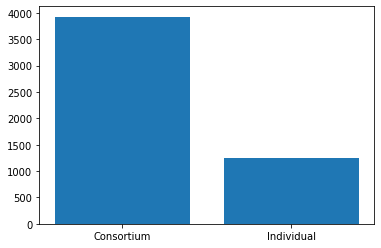

In [282]:
x2=df_production_hypothesis.Ind_or_con.value_counts().index
y2=[df_production_hypothesis['Ind_or_con'].value_counts()[i] for i in x2]
print(x2,y2)
plt.bar(x2,y2)

In [166]:
prod_co_sum = df_production_hypothesis.groupby(by="Ind_or_con").agg({'margin':['count','mean','std','skew','median']})
prod_co_sum 

margin                                           
            count      mean         std       skew    median
Ind_or_con                                                  
Consortium   3928  8.747684  217.540496  54.667518  1.071653
Individual   1252  5.508295   27.258165  12.884054  1.177121

### WORD CLOUD Analysis

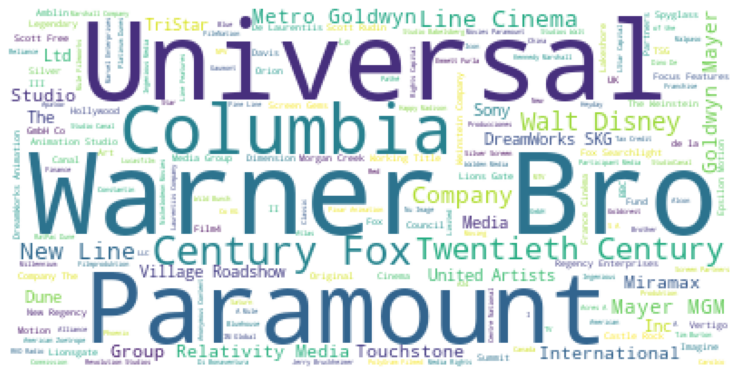

In [291]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
Overview= ' '.join(df_production_hypothesis['list_prod_co'].fillna('').values)
plt.figure(figsize =(13,13))
ov_wc = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=["Productions","Production","Film","Films","Entertainment","Corporation","Picture","Pictures"] 
)

# generate the word cloud
ov_wc.generate(Overview)
plt.imshow(ov_wc)
plt.axis('off')
plt.show()

### BOX PLOT Analysis of Individual and Consortium of Prouction houses

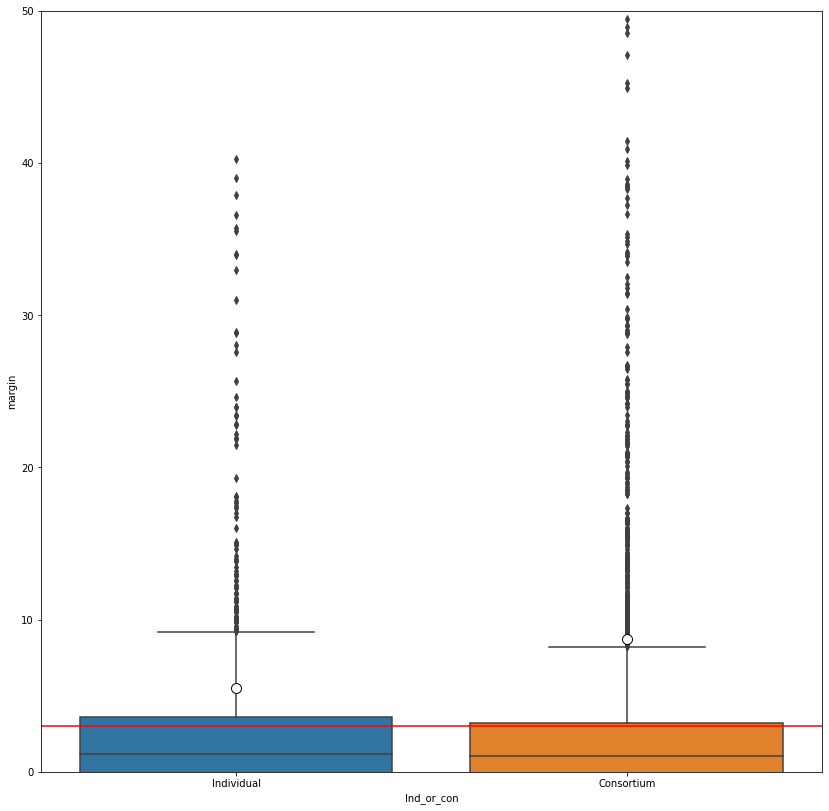

In [292]:
fig, ax = plt.subplots(1,1, figsize=(14,14))
box_plot = sns.boxplot(x = 'Ind_or_con', y = 'margin', data = df_production_hypothesis,ax=ax,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylim(0,50)
plt.axhline(3, color='red')

#### INFERENCE: 

Consortiums have significantly higher mean on margin than Individual Production Houses

Median of the margins for both consortiums and Individual Production houses almost same with a slight upward change for Individual Production Houses


### Checking for NORMALITY in the Data.

In [297]:
stats.shapiro(df_production_hypothesis.margin)


ShapiroResult(statistic=0.013239264488220215, pvalue=0.0)

In [249]:
### For a skewed a data We read an article which says it does not give right P-Value

stats.anderson(df_production_hypothesis.margin)

AndersonResult(statistic=1862.9373684068796, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### As proven above, that we have a LOGNORMAL data, we are using lognormal to get our CI

<AxesSubplot:ylabel='Density'>

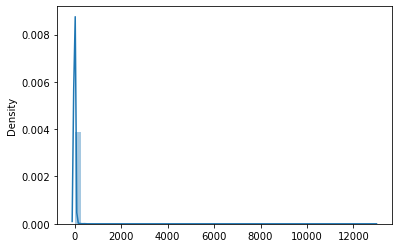

In [219]:
sns.distplot(x= df_production_hypothesis.margin)

### REASONING: For Hypothesis Test selection

In [295]:
##Mean at 95% confidence interval for Multiple Production Houses - Consortium
sd =prod_co_sum.iloc[0][2]
n =prod_co_sum.iloc[0][0]
me =prod_co_sum.iloc[0][4]

interval = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
print(interval)

(1.0716563030453996, 2453231.7972548385)


In [296]:
##Mean at 95% confidence interval for Single Production Houses  - Individuals
sd =prod_co_sum.iloc[1][2]
n =prod_co_sum.iloc[1][0]
me =prod_co_sum.iloc[1][4]

interval = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))
print(interval)

(1.7644609484857066, 19.105634360919364)


In [298]:
x5=np.array(df[df_production_hypothesis.Ind_or_con=='Consortium'].margin)
y5=np.array(df[df_production_hypothesis.Ind_or_con=='Individual'].margin)

#### H0 - Margins earned by Individual Production Houses and Consortium  are  same(Individual Production Houses = Consortium)
#### H1 - Margins earned by Individual Production Houses and Consortium  are not same(Individual Production Houses != Consortium)

In [338]:
charge_stat,pvalue=stats.mannwhitneyu(x5,y5)
charge_stat,pvalue

(2368177.5, 0.02445134205466866)

In [339]:
if pvalue < 0.05:
    print('Reject Null Hypothesis')
    print('Margins earned by Individual Production Houses and Consortium  are different')
else:
    print('Failed to reject Null Hypothesis')
    print('Margins earned by Individual Production Houses and Consortium  are same')

Reject Null Hypothesis
Margins earned by Individual Production Houses and Consortium  are different


### Creating a KDE Plot to understand the difference in distribution of Consortium and Individual

(-100.0, 200.0)

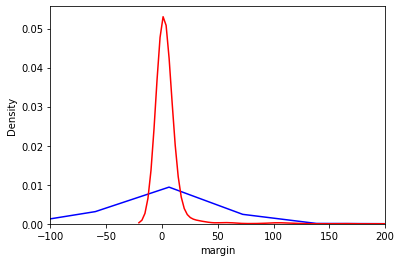

In [346]:
sns.kdeplot(df[df_production_hypothesis.Ind_or_con=='Consortium'].margin, color="blue")
sns.kdeplot(df[df_production_hypothesis.Ind_or_con=='Individual'].margin, color="red" )
plt.xlim(-100,200)

### INFERENCE: 

In [386]:
print(type(df_production_hypothesis['list_prod_co'].value_counts()[:10]))

<class 'pandas.core.series.Series'>


In [395]:
df_agg = df_production_hypothesis[df_production_hypothesis.Ind_or_con=='Individual']
df_agg = df_agg.groupby('list_prod_co')['margin'].agg(['count','mean','std','skew','median'])
df_agg.sort_values("count",ascending=False,inplace=True)
df_trim =df_agg[:10]
df_trim


,count,mean,std,skew,median
list_prod_co,,,,,
Paramount Pictures,92,4.759592,8.675368,4.002197,2.380194
Universal Pictures,59,3.665481,6.782416,3.725142,1.711595
Metro-Goldwyn-Mayer (MGM),54,2.025399,2.719760,1.613511,1.297436
Warner Bros.,52,2.000181,2.498717,1.876667,1.591309
Twentieth Century Fox Film Corporation,45,3.289334,4.104274,1.837591,1.923205
Columbia Pictures,39,2.506310,4.429501,3.455774,1.068099
New Line Cinema,38,2.084707,2.668036,1.481826,1.226942
Touchstone Pictures,24,1.833942,2.933693,1.015632,0.487205
Walt Disney Pictures,23,5.477708,12.640696,2.892902,0.518484


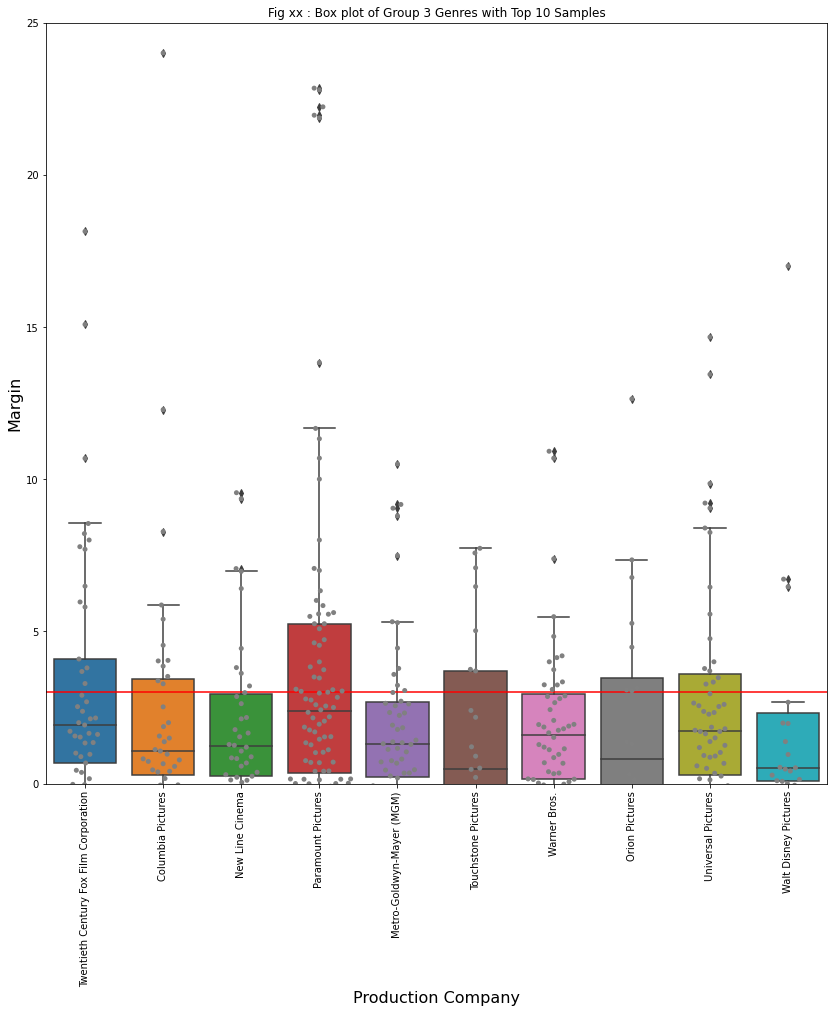

In [399]:
fig, ax = plt.subplots(1,1, figsize=(14,14))

mrnList = list(df_trim.index.values)

df_filtered = df_production_hypothesis[df_production_hypothesis['list_prod_co'].isin(mrnList)]
sns.boxplot(x = 'list_prod_co', y = 'margin', data = df_filtered)
plt.xticks(rotation=90)
plt.axhline(3, color='red')

plt.ylim(0,75)
# Add jitter with the swarmplot function
ax = sns.swarmplot(x = 'list_prod_co', y = 'margin', data = df_filtered, color="grey")
plt.xlabel('Production Company', fontsize=16)
plt.ylabel('Margin', fontsize=16)
plt.ylim(0,25)
plt.labelsize      : 'large'  # fontsize of the x any y labels
plt.title("Fig xx : Box plot of Group 3 Genres with Top 10 Samples")
plt.show()

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7f9b3393dc50>)

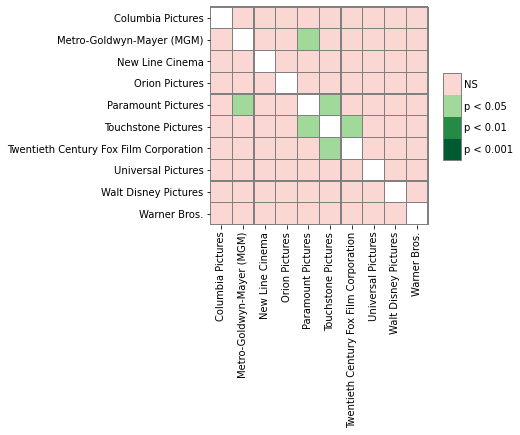

In [490]:
pc = sp.posthoc_dunn(df_filtered, val_col='margin', group_col='list_prod_co')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

In [491]:
# Median at 95% confidence Interval for  Genres :'Metro-Goldwyn-Mayer (MGM)'

mu =df_agg.loc['Metro-Goldwyn-Mayer (MGM)']['mean']
sd =df_agg.loc['Metro-Goldwyn-Mayer (MGM)']['std']
n =df_agg.loc['Metro-Goldwyn-Mayer (MGM)']['count']
me =df_agg.loc['Metro-Goldwyn-Mayer (MGM)']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print((mu,Lower_limit,Upper_limit))

(2.0253985357510076, 4.383475315080236, 5.637908635313143)


In [492]:
# Median at 95% confidence Interval for  Production House :Paramount Pictures

mu =df_agg.loc['Paramount Pictures']['mean']
sd =df_agg.loc['Paramount Pictures']['std']
n =df_agg.loc['Paramount Pictures']['count']
me =df_agg.loc['Paramount Pictures']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print((mu,Lower_limit,Upper_limit))

(4.7595921091059665, 8.652788138171514, 20.999494940119146)


In [493]:
# Median at 95% confidence Interval for  Production House :Touchstone Pictures

mu =df_agg.loc['Touchstone Pictures']['mean']
sd =df_agg.loc['Touchstone Pictures']['std']
n =df_agg.loc['Touchstone Pictures']['count']
me =df_agg.loc['Touchstone Pictures']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print((mu,Lower_limit,Upper_limit))

(1.8339420738590828, 1.8414472852314432, 2.4437242335535947)


In [494]:
# Median at 95% confidence Interval for  Production House :Twentieth Century Fox Film Corporation

mu =df_agg.loc['Twentieth Century Fox Film Corporation']['mean']
sd =df_agg.loc['Twentieth Century Fox Film Corporation']['std']
n =df_agg.loc['Twentieth Century Fox Film Corporation']['count']
me =df_agg.loc['Twentieth Century Fox Film Corporation']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print((mu,Lower_limit,Upper_limit))

(3.2893336029869524, 7.213313346777666, 10.77455820723524)


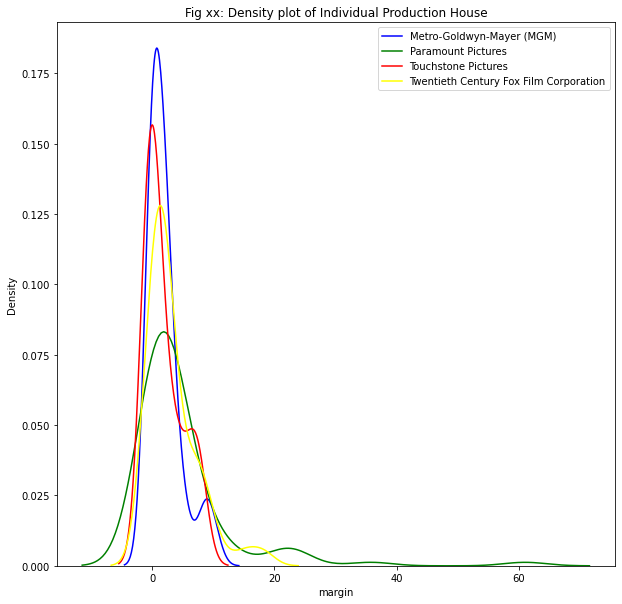

In [495]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


S1= df_production_hypothesis[df_production_hypothesis['list_prod_co'] =='Metro-Goldwyn-Mayer (MGM)']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='blue' )


S1= df_production_hypothesis[df_production_hypothesis['list_prod_co'] =='Paramount Pictures']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='green' )

S1= df_production_hypothesis[df_production_hypothesis['list_prod_co'] =='Touchstone Pictures']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='red' )

S1= df_production_hypothesis[df_production_hypothesis['list_prod_co'] =='Twentieth Century Fox Film Corporation']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='Yellow' )

# Function add a legend  
plt.legend(['Metro-Goldwyn-Mayer (MGM)','Paramount Pictures','Touchstone Pictures','Twentieth Century Fox Film Corporation'])

plt.title ('Fig xx: Density plot of Individual Production House')

plt.show()

In [415]:
df_crosstab_prod_margin=pd.crosstab(df_production_hypothesis['Ind_or_con'],df_production_hypothesis['margin_cat'])
print(df_crosstab_prod_margin)

test_stat, p_value, dof, expected_value = stats.chi2_contingency(df_crosstab_prod_margin,correction=False)

print("p-value:", pvalue)
print('Test statistic:', test_stat)
print('Degrees of freedom:', dof)
print('Expected value:', expected_value)


margin_cat  High  Loss   Low
Ind_or_con                  
Consortium   793  1164  1971
Individual   281   355   616
p-value: 0.02445134205466866
Test statistic: 3.0407309705834926
Degrees of freedom: 2
Expected value: [[ 814.41544402 1151.85945946 1961.72509653]
 [ 259.58455598  367.14054054  625.27490347]]


In [488]:
## Chi-Square Test using the Cross Tab of Production House (Individual/Consortiums) against Margin categories


test_stat, p, dof, expected_value = chi2_contingency(observed = df_crosstab_prod_margin, correction = False)

print("p-value:", p)
print('Test statistic:', test_stat)
print('Degrees of freedom:', dof)
print('Expected value:', expected_value)


p-value: 0.21863196558033626
Test statistic: 3.0407309705834926
Degrees of freedom: 2
Expected value: [[ 814.41544402 1151.85945946 1961.72509653]
 [ 259.58455598  367.14054054  625.27490347]]


In [489]:
if pvalue < 0.05:
    print('Reject Null Hypothesis')
    print('The Margins are not independent on nature of the Production House(Individual or Consortium)')
else:
    print('Failed to reject Null Hypothesis')
    print('The Margins are independent of  whether release is through Individual or Consortium')

Reject Null Hypothesis
The Margins are not independent on nature of the Production House(Individual or Consortium)


## HYPOTHESIS-5 :

#### GENRES (KRUSKAL WALLIS | ONE WAY ANOVA | POST-HOC | SIMULATION)

<b> Genres </b> : a style or category of art, music, or movie type  <br>
<b> Margin </b> = <i> f </i>(<b>Genres</b>,...) <br>
Margin is the depedant variable of continous type  <br>
Genres is the independent variable of discrete type

### Data Staging
genres column is populated with json sytle dictionary which is split into list for easy analysis in data cleaning phase

### Data Extraction

In [124]:
# receive dataframe into intermediate df_genres dataframe 
#df_genres.drop(columns=df_genre.columns[:])

df_genres = df_clean


# remove unwanted columns
df_genres = df_genres[['id','list_genres','margin']]

### Data Transformation

In [125]:
# count of Genres
df_genres['Num_of_Genres'] = df_genres['list_genres'].apply(len)


In [126]:
df_genres['str_genres'] = df_genres['list_genres'].apply(sort_val_within_row)

In [132]:
df_genres.head(2)

,id,list_genres,margin,Num_of_Genres,str_genres
0,862,"[Animation, Comedy, Family]",11.451801,3,"Animation,Comedy,Family"
1,8844,"[Adventure, Fantasy, Family]",3.043035,3,"Adventure,Family,Fantasy"


### Exploratory Data Analysis :

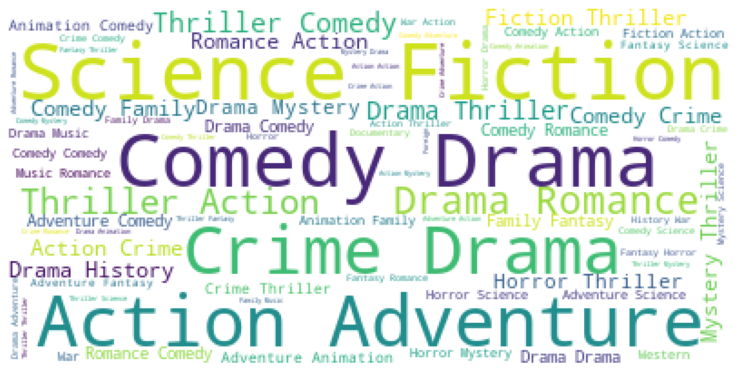

In [133]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
Overview= ' '.join(df_genres['str_genres'].fillna('').values)
plt.figure(figsize =(13,13))
ov_wc = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=stopwords 
)

# generate the word cloud
ov_wc.generate(Overview)
plt.imshow(ov_wc)
plt.axis('off')
plt.show()

In [134]:
df_genres['str_genres'].value_counts()

Drama                                      362
Comedy                                     299
Drama,Romance                              201
Comedy,Drama,Romance                       184
Comedy,Drama                               180
                                          ... 
Animation,Comedy,Drama,Family,Music          1
Action,Animation,Family,Science Fiction      1
Action,Romance,War                           1
Documentary,History,Music                    1
Drama,History,Music,Romance                  1
Name: str_genres, Length: 685, dtype: int64

In [135]:
# Median at 95% confidence Interval for All Genres

mu =df_genres['margin'].mean()
sd =df_genres['margin'].std()
n =df_genres['margin'].count()
me =df_genres['margin'].median()

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If the genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If the genres are randomly selected then we can expect a Median margin return of 7.96 ranging from 1.09 to 442850 at 95 percent confidence 


### If the genres are randomly selected then we can expect a Median margin return of 7.96 ranging from 1.09 to 442850 at 95 percent confidence Interval ###

  


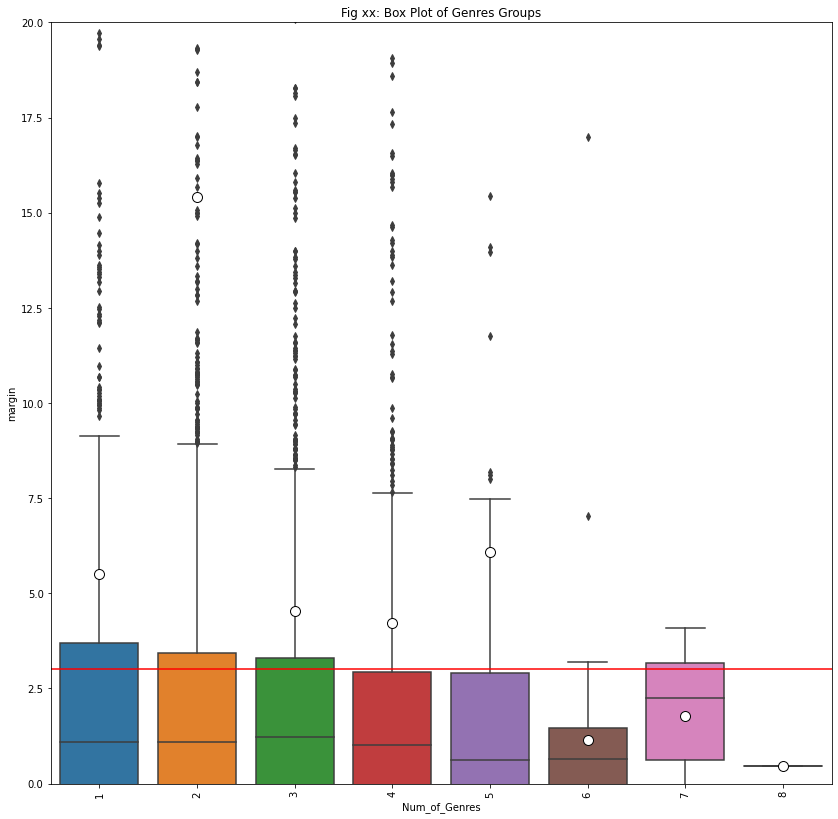

In [137]:
fig, ax = plt.subplots(1,1, figsize=(14,14))
plt.ylim (0,20)
box_plot = sns.boxplot(x = 'Num_of_Genres', y = 'margin', data = df_genres,ax=ax,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xticks(rotation=90)
plt.axhline(3, color='red')
plt.title('Fig xx: Box Plot of Genres Groups')   

plt.show()

 

#### Grouping the data into number of Genres , we can see it ranges from single Genres to a combination of 8 Genres ####

## Hypothesis Testing - Genres Level 1

In the given dataset, the `Genres` is a categorical variable and `Margin` is a numeric variable.  

Let us check the normality of the Margin.

In [138]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = stats.shapiro(df_genres['margin'])

# print the p-value
print('p-value:', p_value)

p-value: 0.0


From the above result, we can see that the p-value is less than 0.05, thus we can say that the Margin is not normally distributed. Thus the assumption of normality is not satisfied. 
#### We can use the non-parametric Kruskal-Wallis H test to check the equality of genres.

The null and alternative hypothesis is:

<b> H<sub>0</sub></b>: The average Margin for all the `genres`' group is the same<br>
<b>H<sub>1</sub></b>: The average Margin for at least one `genres` group  is different

In [139]:
genres_summary = df_genres.groupby('Num_of_Genres')['margin'].agg(['count','mean','std','skew','median'])
genres_summary

,count,mean,std,skew,median
Num_of_Genres,,,,,
1,887,5.502598,20.920258,9.749512,1.095840
2,1553,15.418418,344.157762,34.880912,1.089294
3,1699,4.546846,21.555334,15.306269,1.216074
4,758,4.223105,28.662471,20.174526,1.016082
5,239,6.082496,65.797141,15.395254,0.628024
6,40,1.149202,2.958612,4.303021,0.653699
7,3,1.777731,2.578140,-0.776899,2.237449
8,1,0.458521,NaN,NaN,0.458521


### Kruskal-Wallis H test ###

In [141]:
# perform kruskal-wallis H test
# pass the Margin for each genres

One = df_genres[df_genres['Num_of_Genres'] == 1]['margin']
Two = df_genres[df_genres['Num_of_Genres'] == 2]['margin']
Three = df_genres[df_genres['Num_of_Genres'] == 3]['margin']
Four = df_genres[df_genres['Num_of_Genres'] == 4]['margin']
Five = df_genres[df_genres['Num_of_Genres'] == 5]['margin']
Six = df_genres[df_genres['Num_of_Genres'] == 6]['margin']
Seven = df_genres[df_genres['Num_of_Genres'] == 7]['margin']
H_stat,p_value = stats.kruskal(One,Two,Three,Four,Five,Six,Seven)
print('Kruskal-Wallis H test p_value = %1.3f'%p_value)

Kruskal-Wallis H test p_value = 0.044


#### The above output shows that the p value  is less than 0.05. Thus we reject the null hypothesis and conclude that the average margin for at least one genres group is different. ####

We need to perform Post-Hoc test to find which of the Genres group are different , since each of the groups are unequal , we need to perform <b> Dunn’s multiple Comparison test <b>

### Post Hoc - Dunn’s multiple Comparison test

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7f9afcffd950>)

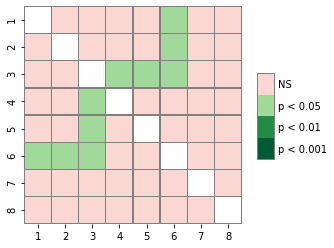

In [145]:
pc = sp.posthoc_dunn(df_genres, val_col='margin', group_col='Num_of_Genres')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

### Interpretation : ###

From the above heat map we can see significant difference between the following groups (1,6)(2,6)(3,4)(3,5) and (3,6) . From the earlier box plot we have noticed that group six is below the other median and can be eliminated from further study .


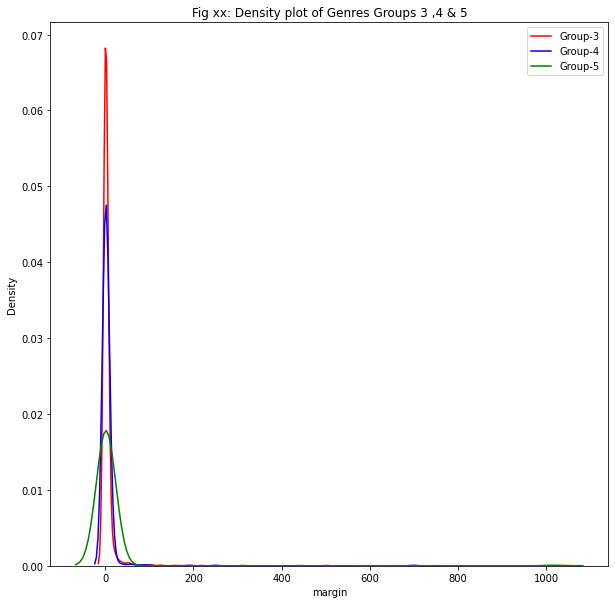

In [146]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


G3= df_genres.query('Num_of_Genres==3')['margin']
ax = sns.distplot(a = G3, hist = False, kde_kws = dict(cumulative=False),color='red' )

G4 = df_genres.query('Num_of_Genres==4')['margin']
ax = sns.distplot(a = G4, hist = False, kde_kws = dict(cumulative=False),color='blue')

G5 = df_genres.query('Num_of_Genres==5')['margin']
ax = sns.distplot(a = G5, hist = False, kde_kws = dict(cumulative=False),color='green')

# Function add a legend  
plt.legend(['Group-3','Group-4','Group-5'])

plt.title ('Fig xx: Density plot of Genres Groups 3 ,4 & 5')
plt.show()

In [147]:
# Median at 95% confidence Interval for 3 Genres
skew =genres_summary.iloc[2][3]
mu =genres_summary.iloc[2][1]
sd =genres_summary.iloc[2][2]
n =genres_summary.iloc[2][0]
me =genres_summary.iloc[2][4]

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If a combination 3 genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If a combination 3 genres are randomly selected then we can expect a Median margin return of 4.55 ranging from 2.09 to 14 at 95 percent confidence 


### Interpretation ###
If a combination 3 genres are randomly selected then we can expect a mean margin return of 4.55 ranging from 2.09 to 14 at 95 percent confidence 

In [148]:
# Median at 95% confidence Interval for 4 Genres
skew =genres_summary.iloc[3][3]
mu =genres_summary.iloc[3][1]
sd =genres_summary.iloc[3][2]
n =genres_summary.iloc[3][0]
me =genres_summary.iloc[3][4]

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If a combination 4 genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If a combination 4 genres are randomly selected then we can expect a Median margin return of 4.22 ranging from 1.47 to 17 at 95 percent confidence 


### Interpretation ###
If a combination 4 genres are randomly selected then we can expect a mean margin return of 4.22 ranging from 1.47 to 17 at 95 percent confidence 

In [149]:
# Median at 95% confidence Interval for 5 Genres
skew =genres_summary.iloc[4][3]
mu =genres_summary.iloc[4][1]
sd =genres_summary.iloc[4][2]
n =genres_summary.iloc[4][0]
me =genres_summary.iloc[4][4]

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If a combination 5 genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If a combination 5 genres are randomly selected then we can expect a Median margin return of 6.08 ranging from 0.66 to 116 at 95 percent confidence 


### Interpretation ###
If a combination 5 genres are randomly selected then we can expect a Median margin return of 6.08 ranging from 0.66 to 116 at 95 percent confidence 

### Group with 3 Genres combination gives the most optimal minimum retruns at 2.09 times investment , 
### However this does not meet our mandate greater than 3 times margin . There for we explore if we can further optmize withing group 3 hence an another level of Hypothesis testing is conducted to find the most optimal combination in 
### 3 - Genres group

In [152]:
Three_genres = df_genres[df_genres['Num_of_Genres'] == 3]

Three_genres['str_genres'].value_counts()

Comedy,Drama,Romance                184
Crime,Drama,Thriller                 98
Action,Crime,Thriller                75
Action,Adventure,Science Fiction     60
Action,Adventure,Thriller            54
                                   ... 
Family,Fantasy,Music                  1
Documentary,History,Music             1
Comedy,Drama,Foreign                  1
Documentary,Drama,Music               1
Mystery,Romance,Thriller              1
Name: str_genres, Length: 211, dtype: int64

In [153]:
Three_genres.head(2)

,id,list_genres,margin,Num_of_Genres,str_genres
0,862,"[Animation, Comedy, Family]",11.451801,3,"Animation,Comedy,Family"
1,8844,"[Adventure, Fantasy, Family]",3.043035,3,"Adventure,Family,Fantasy"


There are <b> 211 distinct combination of 3 Genres movies </b>which would be unweildy to do factor level anaylsis , so we need to do some more exploratory data analyis to

### Find Vital Few from the Trival Many 

In [155]:
# 75th Percentile
def q75(x):
    return x.quantile(0.75)
df_agg =pd.DataFrame(Three_genres.groupby('str_genres')['margin'].agg(['count','sum','mean','std','skew','median',q75]))
df_agg.head(2)

,count,sum,mean,std,skew,median,q75
str_genres,,,,,,,
"Action,Adventure,Animation",1,1.796227,1.796227,NaN,NaN,1.796227,1.796227
"Action,Adventure,Comedy",25,36.920620,1.476825,2.720474,2.940121,0.820209,2.192718


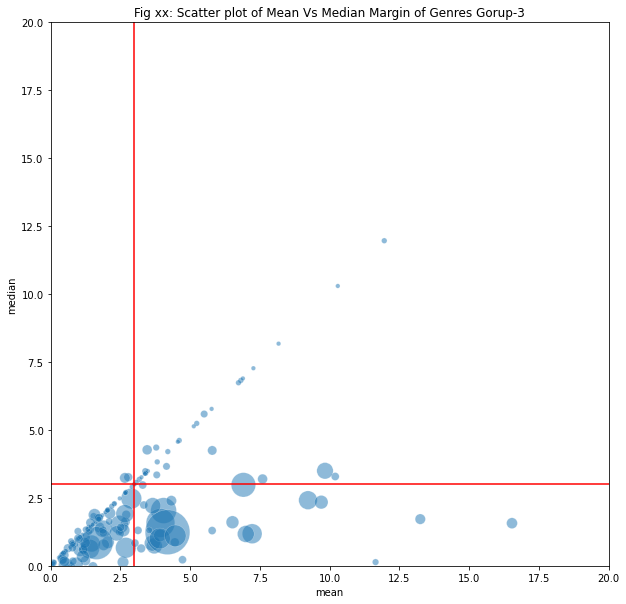

In [156]:
# by Median
#Create figure
fig, ax = plt.subplots(1,1, figsize=(10,10))
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df_agg, x=df_agg['mean'], y=df_agg['median'], size=df_agg['count'], legend=False, sizes=(20, 2000),alpha = 0.5)
plt.title("Fig xx: Scatter plot of Mean Vs Median Margin of Genres Gorup-3")

plt.ylim(0,20)
plt.xlim(0,20)
plt.axvline(3, color='red')
plt.axhline(3, color='red')

# show the graph
plt.show()

Scatter plot above shows that there are some entries which have greater than 3 times Median and Mean Margin , However the size of the bubble which shows the count entries indicate that there are only a few samples.

Sample selection is done for <br>
1) Top 5 Mean Median Margin with more than 1 entry <br>
2) Top 5 count <br>
This givens a homogenous mix to sample 

In [159]:
df_selected = df_agg[df_agg['mean']>target_margin] 
df_selected = df_selected[df_selected['median']>target_margin] 
df_selected = df_selected[df_selected['count']>1] 

In [160]:
df_selected.sort_values("median",ascending=False,inplace=True)

df_trim = df_selected[:5]


In [161]:
df_agg.sort_values("count",ascending=False,inplace=True)
df_trim =df_trim.append(df_agg[:5])
df_trim.sort_values("mean",ascending=False,inplace=True)
df_trim.head(2)

,count,sum,mean,std,skew,median,q75
str_genres,,,,,,,
"Crime,Horror,Mystery",3,132.123746,44.041249,37.903041,0.995513,35.170213,60.381635
"Adventure,Horror,Thriller",2,68.278192,34.139096,45.392281,NaN,34.139096,50.187691


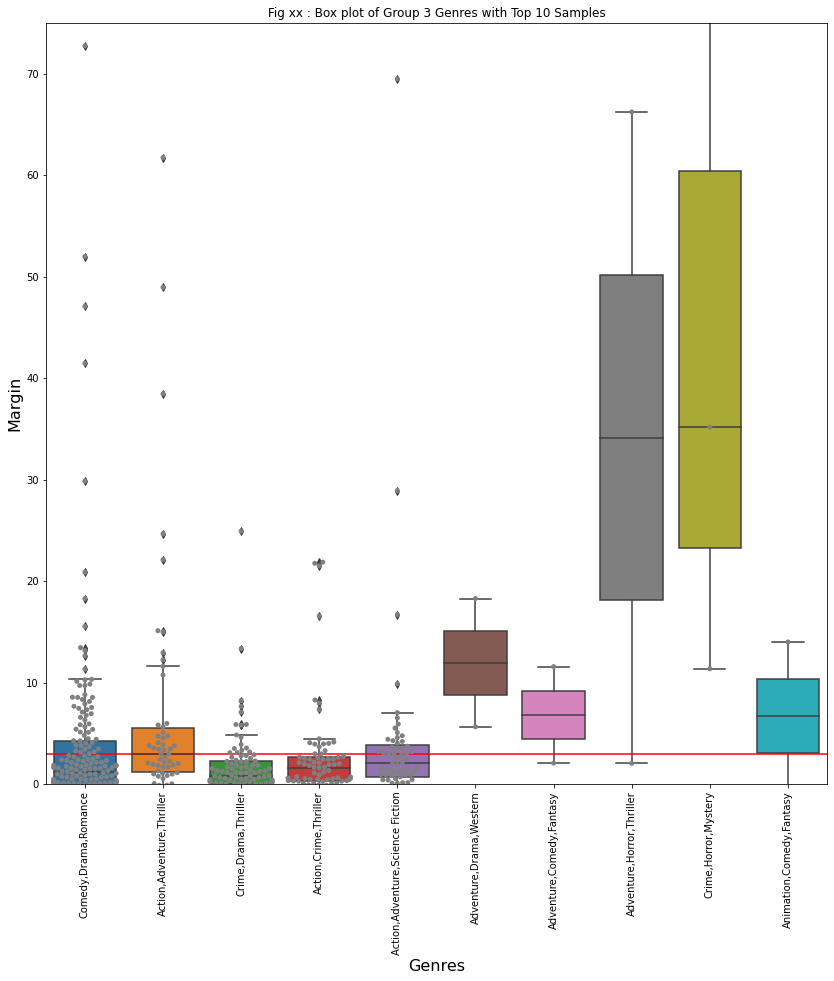

In [162]:
fig, ax = plt.subplots(1,1, figsize=(14,14))

mrnList = list(df_trim.index.values)

df_filtered = df_genres[df_genres['str_genres'].isin(mrnList)]
#sns.boxplot(data =df_filtered,x ='genres_name', y =['Margin'], grid = False)
sns.boxplot(x = 'str_genres', y = 'margin', data = df_filtered)
plt.xticks(rotation=90)
plt.axhline(3, color='red')

plt.ylim(0,75)
# Add jitter with the swarmplot function
ax = sns.swarmplot(x = 'str_genres', y = 'margin', data = df_filtered, color="grey")
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Margin', fontsize=16)
plt.labelsize      : 'large'  # fontsize of the x any y labels
plt.title("Fig xx : Box plot of Group 3 Genres with Top 10 Samples")
plt.show()


### Interpretation 

Above box plot shows that for high median margin groups the sample count is looking less as compared to low Median Margin samples . this observation need to be validated through hypothesis testing.


### Hypothesis Testing - Genres Level 2

The null and alternative hypothesis is:

<b> H<sub>0</sub></b>: The average Margin for all `3-genres combination`' is the same<br>
<b>H<sub>1</sub></b>: The average Margin for at least one `3-genres combination`  is different

### Kruskal-Wallis H Test

In [163]:
# perform kruskal-wallis H test
# pass the Margin for each genres

L01 =df_genres[df_genres['str_genres'] =='Crime,Horror,Mystery']['margin']
L02 =df_genres[df_genres['str_genres'] =='Adventure,Horror,Thriller']['margin']
L03 =df_genres[df_genres['str_genres'] =='Adventure,Drama,Western']['margin']
L04 =df_genres[df_genres['str_genres'] =='Adventure,Comedy,Fantasy']['margin']
L05 =df_genres[df_genres['str_genres'] =='Animation,Comedy,Fantasy']['margin']
L06 =df_genres[df_genres['str_genres'] =='Comedy,Drama,Romance']['margin']
L07 =df_genres[df_genres['str_genres'] =='Crime,Drama,Thriller']['margin']
L08 =df_genres[df_genres['str_genres'] =='Action,Crime,Thriller']['margin']
L09 =df_genres[df_genres['str_genres'] =='Action,Adventure,Science Fiction']['margin']
L10 =df_genres[df_genres['str_genres'] =='Action,Adventure,Thriller']['margin']

H_stat,p_value =stats.kruskal(L01,L02,L03,L04,L05,L06,L07,L08,L09,L10)
print('Kruskal-Wallis H test p_value = %1.3f'%p_value)


Kruskal-Wallis H test p_value = 0.000


The above output shows that the p value is less than 0.05. Thus we reject the null hypothesis and conclude that the average Margin for at least one genres is different.

## Post-Hoc analysis <br>
The Kruskal-Wallis H test has rejected the null hypothesis. Now to identify the genres with a different average Margin we can use the `Dunn test` to perform a post-hoc analysis as the  groups are Unequal.

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7f9b41c42d10>)

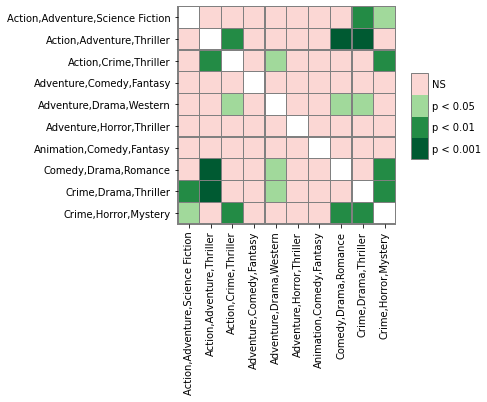

In [164]:
pc = sp.posthoc_dunn(df_filtered, val_col='margin', group_col='str_genres')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

### Interpretation :###
Above Heatmap after Dunn's Post Hoc test shows that only 3 levels namely<br>
[Adventure,Comedy,Fantasy] [Adventure,Horror,Thriller],[Animation,Comedy,Fantasy]<br>
have no significant effect hence they are dropped and granuallar level Post hoc test is conducted using first principles to identify the major contributing Genres

In [165]:
df1 =pd.DataFrame()
df2 =pd.DataFrame()
df3 =pd.DataFrame()
df4 =pd.DataFrame()
df5 =pd.DataFrame()
df6 =pd.DataFrame()
df7 =pd.DataFrame()
df1['CHM'] =df_genres [df_genres['str_genres'] =='Crime,Horror,Mystery']['margin'].dropna()
df2['ADW'] =df_genres [df_genres['str_genres'] =='Adventure,Drama,Western']['margin'].dropna()
df3['CDR'] = df_genres [df_genres['str_genres'] =='Comedy,Drama,Romance']['margin'].dropna()
df4['CDT'] = df_genres [df_genres['str_genres'] =='Crime,Drama,Thriller']['margin'].dropna()
df5['ACT'] = df_genres [df_genres['str_genres'] =='Action,Crime,Thriller']['margin'].dropna()
df6['AAS'] = df_genres [df_genres['str_genres'] =='Action,Adventure,Science Fiction']['margin'].dropna()
df7['AAT'] = df_genres [df_genres['str_genres'] =='Action,Adventure,Thriller']['margin'].dropna()



In [166]:
#selData =pd.DataFrame()
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()
df5 = df5.reset_index()
df6 = df6.reset_index()
df7 = df7.reset_index()
df_sel = [df1['CHM'],df2['ADW'],df3['CDR'],df4['CDT'],df5['ACT'],df6['AAS'],df7['AAT']]

selData = pd.concat(df_sel, axis=1,levels=None)
selData.head()

,CHM,ADW,CDR,CDT,ACT,AAS,AAT
0,11.360476,18.282220,4.090760,2.890261,2.629349,69.490728,0.838576
1,35.170213,5.638866,0.739992,0.000732,21.759359,2.573950,5.072311
2,85.593058,NaN,-0.787114,0.478905,-0.791526,9.892924,1.840672
3,NaN,NaN,-0.112000,1.830311,1.986830,28.911111,2.642860
4,NaN,NaN,-0.742470,-0.750000,0.706123,16.703246,4.721204


* the number of variables (k)
* the number of cases (n)
* the standard error (SE)

The standard error is relatively simply:
\begin{equation*}
SE = \sqrt{\frac{k\times\left(k+1\right)} {6\times n}}
\end{equation*}


In [169]:
variables = selData.columns
k = selData.shape[1]
n = selData.shape[0]

SE = (k * (k + 1) / (6 * n))**0.5

k,n, SE

(7, 184, 0.22522130823072542)

We need to determine the ranking of the scores per row (respondents). I've made a small function that can rank a given list of cases:

In [167]:
def rankList(aList):
    sortList = aList.copy()
    sortList.sort()
    
    latestRank = 1
    rankDict = {}
    rankFreq = {}
    freqScore = 1
    for i in range(1, len(sortList)):

        if sortList[i] == sortList[i-1]:
            freqScore = freqScore + 1

        if sortList[i] != sortList[i-1]:
            rank = (2*latestRank + freqScore - 1) / 2

            rankDict[sortList[i-1]] = rank
            rankFreq[rank] = freqScore
            latestRank = latestRank + freqScore
            freqScore = 1

    # the last case
    rankDict[sortList[len(sortList)-1]] = (2*latestRank + freqScore - 1) / 2
    rankFreq[(2*latestRank + freqScore - 1) / 2] = freqScore
    
    # replace list scores with rank scores
    allRanks = []
    for i in aList:
        allRanks.append(rankDict[i])
    
    return rankFreq, rankDict, allRanks

Now create a new array with the ranks.

In [170]:
ranks = []

for j in range(n):
    x = []
    for i in variables:
        x = x + [list(selData[i])[j]]
    
    rankFreq, rankDict, allRanks = rankList(x)
    
    ranks = ranks + [allRanks]  

We can sum all the ranks:

In [171]:
sumRanks = 0
for i in ranks:
    sumRanks = sumRanks + sum(i)

And then determine the mean of all ranks:

\begin{equation*}
\bar{r} = \frac{\sum_{i=1}^n \sum_{j=1}^k r_{i,j}} {n\times k}
\end{equation*}

Where $r_{i,j}$ is the rank of the i-th respondent on the j-th variable.

In [172]:
meanRank = sumRanks / (n*k)
meanRank

4.0

Now we focus on looking at the columns.

We determine the average rank of each variable

\begin{equation*}
\bar{r}_j = \frac{\sum_{i=1}^n r_{i,j}} {n}
\end{equation*}



In [173]:
meanRvar = []

for i in range(k):
    sumRank = 0
    for j in range(n):
        sumRank = sumRank + ranks[j][i]
    
    meanRvar = meanRvar + [sumRank/n]
    
meanRvar

[1.0543478260869565,
 2.0380434782608696,
 3.766304347826087,
 4.065217391304348,
 4.815217391304348,
 5.733695652173913,
 6.5271739130434785]

We will also need to convert our z-values to a p-value. For this we need the normal distribution, which is available in the scipy.stats package:

Now for each possible pair of variable i and variable j we determine:

The difference in mean rank:
\begin{equation*}
d_{i,j} = \bar{r}_i - \bar{r}_j
\end{equation*}

The test-statistic
\begin{equation*}
Z_{i,j} = \frac{d_{i,j}}{SE}
\end{equation*}

From these z-values the p-value (p) can be determined.

To adjust for the multiple testing, we can multiply the unadjuste p-value with the number of tests we perform, which can be determined by:
\begin{equation*}
M = \frac{k\times\left(k-1\right)} {2}
\end{equation*}

The so-called Bonferroni adjuste p-value is then:

\begin{equation*}
p_{adj.} = p \times M
\end{equation*}

Below all the code that does this, and stores the result in a pandas dataframe.

In [177]:
postHocDunn = pd.DataFrame(columns=['variable 1', 'variable 2', 'Z value', 'p-unadj.', 'p-adj.'])

mlt = k * (k - 1) / 2

for i in range(0, k-1):
    for j in range(i+1, k):
        var1 = variables[i]
        var2 = variables[j]
        d = meanRvar[i]-meanRvar[j]
        Z = d / SE
        pUnc = stats.norm.sf(abs(Z))*2
        pAdj = pUnc * mlt
        
        # after the multiplication the adjusted p-value could become larger than 1, this is impossible so counter this with:
        if pAdj > 1:
            pAdj = 1
        
        newRow = {'variable 1':var1, 'variable 2':var2, 'Z value':Z, 'p-unadj.':pUnc, 'p-adj.':pAdj}
        postHocDunn = postHocDunn.append(newRow, ignore_index=True)        

In [178]:
#postHocDunn
postHocDunn.sort_values("Z value",ascending=False,inplace=True)
postHocDunn

,variable 1,variable 2,Z value,p-unadj.,p-adj.
11,CDR,CDT,-1.327197,1.844435e-01,1.000000e+00
15,CDT,ACT,-3.330058,8.682792e-04,1.823386e-02
20,AAS,AAT,-3.523105,4.265227e-04,8.956978e-03
18,ACT,AAS,-4.078114,4.540243e-05,9.534509e-04
0,CHM,ADW,-4.367685,1.255706e-05,2.636983e-04
12,CDR,ACT,-4.657255,3.204536e-06,6.729525e-05
16,CDT,AAS,-7.408172,1.280519e-13,2.689089e-12
19,ACT,AAT,-7.601219,2.933538e-14,6.160430e-13
6,ADW,CDR,-7.673612,1.672198e-14,3.511615e-13
13,CDR,AAS,-8.735369,2.428613e-18,5.100088e-17


In [179]:
# Median at 95% confidence Interval for  Genres :Comedy,Drama,Romance

mu =df_agg.loc['Comedy,Drama,Romance']['mean']
sd =df_agg.loc['Comedy,Drama,Romance']['std']
n =df_agg.loc['Comedy,Drama,Romance']['count']
me =df_agg.loc['Comedy,Drama,Romance']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If the genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If the genres are randomly selected then we can expect a Median margin return of 4.19 ranging from 3.04 to 7 at 95 percent confidence 


In [180]:
# Median at 95% confidence Interval for  Genres :Crime,Drama,Thriller

mu =df_agg.loc['Crime,Drama,Thriller']['mean']
sd =df_agg.loc['Crime,Drama,Thriller']['std']
n =df_agg.loc['Crime,Drama,Thriller']['count']
me =df_agg.loc['Crime,Drama,Thriller']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If the genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If the genres are randomly selected then we can expect a Median margin return of 1.65 ranging from 2.70 to 3 at 95 percent confidence 


In [181]:
# Median at 95% confidence Interval for  Genres :Crime,Drama,Thriller

mu =df_agg.loc['Crime,Horror,Mystery']['mean']
sd =df_agg.loc['Crime,Horror,Mystery']['std']
n =df_agg.loc['Crime,Horror,Mystery']['count']
me =df_agg.loc['Crime,Horror,Mystery']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If the genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If the genres are randomly selected then we can expect a Median margin return of 44.04 ranging from 174585411823574.66 to 20251197612162516 at 95 percent confidence 


In [182]:
# Median at 95% confidence Interval for  Genres :Crime,Drama,Thriller

mu =df_agg.loc['Adventure,Drama,Western']['mean']
sd =df_agg.loc['Adventure,Drama,Western']['std']
n =df_agg.loc['Adventure,Drama,Western']['count']
me =df_agg.loc['Adventure,Drama,Western']['median']

Lower_limit,Upper_limit = stats.lognorm.interval(0.05, s=sd, loc = me, scale = np.exp(me))

print('If the genres are randomly selected then we can expect a Median margin return of %1.2f ranging from %1.2f to %1d at '
      '95 percent confidence '
      %(mu,Lower_limit,Upper_limit))

If the genres are randomly selected then we can expect a Median margin return of 11.96 ranging from 89327.63 to 274086 at 95 percent confidence 


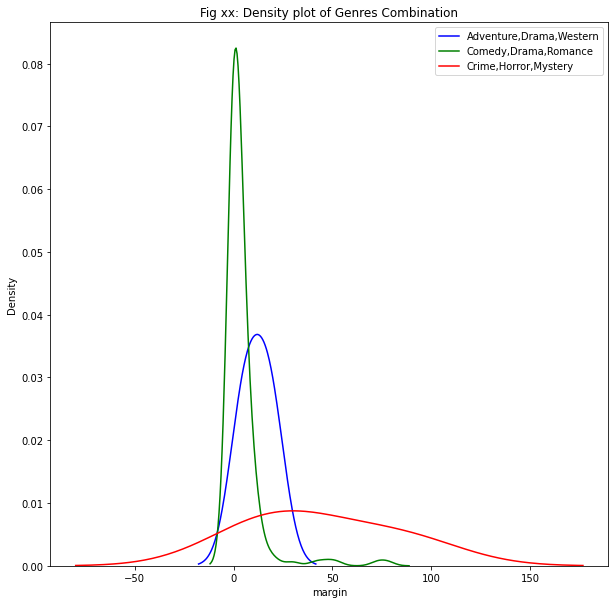

In [183]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


S1= df_genres[df_genres['str_genres'] =='Adventure,Drama,Western']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='blue' )


S1= df_genres[df_genres['str_genres'] =='Comedy,Drama,Romance']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='green' )

S1= df_genres[df_genres['str_genres'] =='Crime,Horror,Mystery']['margin']
ax = sns.distplot(a = S1, hist = False, kde_kws = dict(cumulative=False),color='red' )

# Function add a legend  
plt.legend(['Adventure,Drama,Western','Comedy,Drama,Romance','Crime,Horror,Mystery'])

plt.title ('Fig xx: Density plot of Genres Combination')

plt.show()

## Recomendation

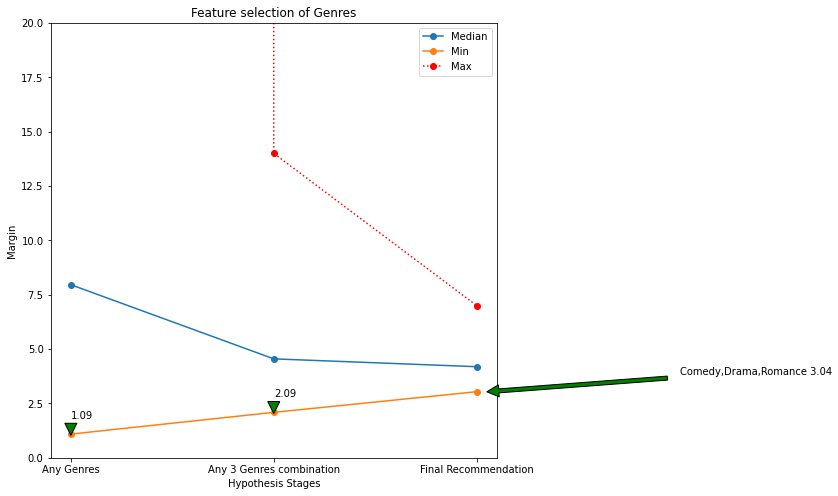

In [185]:
plt.figure(figsize=(8,8))

# initialise data of lists.
data = {'Legend':['Any Genres','Any 3 Genres combination','Final Recommendation'],
         'Median':[7.96,4.55,4.19],
         'Min':[1.09,2.09,3.04],
         'Max':[442850,14,7]}
 
# Create DataFrame
Result = pd.DataFrame(data)
 
# Print the output.
Result

x = Result['Legend']
y1 =Result['Median']
y2 =Result['Min']
y3 =Result['Max']
plt.plot(x, y1,marker = 'o')  # Plot the chart
plt.plot(x, y2,marker = 'o')  # Plot the chart
plt.plot(x, y3,'o:r')  # Plot the chart
# Function add a legend  
plt.legend(['Median','Min','Max'])
plt.ylim(0,20)
plt.annotate('1.09', xy =('Any Genres', 1),
            xytext =('Any Genres', 1.8), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
                
plt.annotate('2.09', xy =('Any 3 Genres combination', 2),
            xytext =('Any 3 Genres combination', 2.8), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)


plt.annotate('Comedy,Drama,Romance 3.04', xy =('Final Recommendation', 3),
            xytext =("Comedy,Drama,Romance 3.04", 3.8), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title("Feature selection of Genres")
plt.xlabel("Hypothesis Stages")
plt.ylabel("Margin")

plt.show()  # display


<b> Recomendation for Genres </b> : Evolution of parameter optimization for Genres has been depicted in the above figure with improvement of base support from a minimum of 1.09 to 3.04 through statistical anaylsis of Genres. The team recommends to produce a Comedy , Drama and Romance combination movie as we can say with 95% confidence that this combination will give atleast 3.04 times return on investment.

## CONCLUSION (Lets go through Conclusion first and validate the simulation later)


1. Runtime need to be limited within 110 minutes
2. Popularity is weakly effecting the margin of the movie
3. Language is not playing much role in determining the profitablility of the movie
4. Production house in contrary to expectation is having a better lower margin support as well better profitablity with single Production house, and couple of them that are doing really good are MGM, Paramount, Touchstone
5. and Finally the 3 Genres movies are having higher probability

### SIMULATION

#### HOW ARE WE DOING the Simulation?

The dotted line which is signifying the population statistic
The Percentage of times the lower interval of sample is GREATER than the population statistic is the success rate

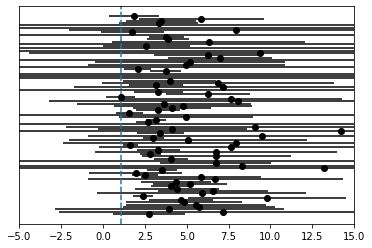

Matched 82.95454545454545% of times.


In [473]:
# Single Language Simulation
simulate_test_for_sample(df_language_hypothesis[df_language_hypothesis['Released_Languages_Final'] == 'Single_Language'], 'list_spoken_languages', 'margin', 40, 'lognormal', 1.0931, 0.05)

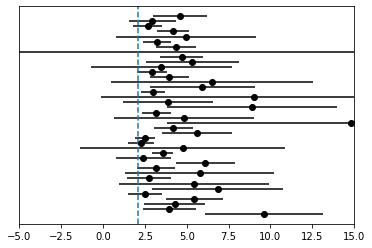

Matched 82.5% of times.


In [474]:
# Multiple Language Simulation
simulate_test_for_sample(df_language_hypothesis[df_language_hypothesis['Released_Languages_Final'] == 'MultiLingual'], 'list_spoken_languages', 'margin', 40, 'lognormal', 2.099, 0.05)

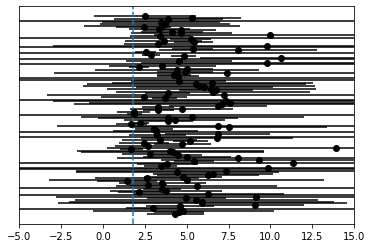

Matched 74.4186046511628% of times.


In [497]:
# Production House Simulation
simulate_test_for_sample(df_production_hypothesis, 'list_prod_co', 'margin', 40, 'lognormal', 1.7644, 0.05)

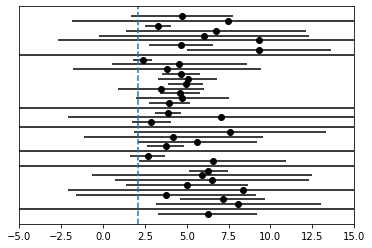

Matched 80.95238095238095% of times.


In [337]:
# Three_genres SIMULATION
simulate_test_for_sample(Three_genres, 'str_genres', 'margin', 40, 'lognormal', 2.09, 0.05)

### References

# THANK YOU ! Q&A!!!